In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cycler import cycler

"""
Enables the ieee conference formatting. 
The plots generated will have Times New Roman fonts set, 
tex output enabled, a font size of 8, 
figure size of 3.5 in x 2.5 in and a dpi of 600. 
A color cycler and linestyle cycler will be setup. 
Beware this will modify your matplotlib rcParams.
"""
default_cycler = (cycler(color=['k', 'r', 'b', 'g']) +
                cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 600

#plt.rcParams['text.usetex'] = True

In [ ]:
df = pd.read_csv('HF_grid_search SN02 20231113.csv', sep='\s*,\s*')

df

In [3]:
df.groupby('Amplifier Voltage')

def normalize_column(column):
    """
    Normalize a DataFrame column by subtracting the smallest value and then dividing by the largest value.
    """
    min_val = column.min()
    max_val = column.max() - min_val
    normalized = (column - min_val) / max_val
    return normalized

# List of columns to normalize
columns_to_normalize = [
    'Immediate Reading Solid', 'Immediate Reading Split',
    'Immediate Reading Combined']

# Normalize the columns
for col in columns_to_normalize:
    df[f'Normalized {col}'] = df.groupby('Amplifier Voltage')[col].transform(normalize_column)

# Invert the scale of some of the columns
columns_to_invert = ['Immediate Reading Solid', 'Immediate Reading Split',
    'Immediate Reading Combined']
for col in columns_to_invert:
    df[f'Normalized {col}'] = 1 - df[f'Normalized {col}']

og_df = df

df

,Amplifier Voltage,Solid Capacitance,Split Capacitance,Immediate Reading Solid,Immediate Reading Split,Immediate Reading Combined,5 Second Reading Solid,5 Second Reading Split,5 Second Reading Combined,Vpp Solid,Vpp Split,Normalized Immediate Reading Solid,Normalized Immediate Reading Split,Normalized Immediate Reading Combined
0,5,50,56,30914.0,31040.0,61954.0,30912.0,31037.0,61949.0,20,20,0.227672,0.009912,0.008440
1,5,50,57,31012.0,30983.0,61995.0,31012.0,30984.0,61996.0,20,20,0.177078,0.025181,0.000000
2,5,50,58,31120.0,30864.0,61984.0,31123.0,30868.0,61991.0,80,115,0.121322,0.057059,0.002264
3,5,50,59,31355.0,29681.0,61036.0,31357.0,29682.0,61039.0,89,138,0.000000,0.373962,0.197406
4,5,50,60,31252.0,28910.0,60162.0,31253.0,28912.0,60165.0,90,140,0.053175,0.580498,0.377316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,10,56,58,39406.0,43342.0,82748.0,39410.0,43345.0,82755.0,420,569,0.895633,0.010314,0.289950
94,10,56,59,40926.0,40055.0,80981.0,40920.0,40053.0,80973.0,430,646,0.660266,0.285954,0.401426
95,10,56,60,41067.0,37214.0,78281.0,41069.0,37213.0,78282.0,417,624,0.638433,0.524193,0.571762
96,10,56,61,40672.0,33743.0,74415.0,40672.0,33743.0,74415.0,396,555,0.699597,0.815262,0.815658


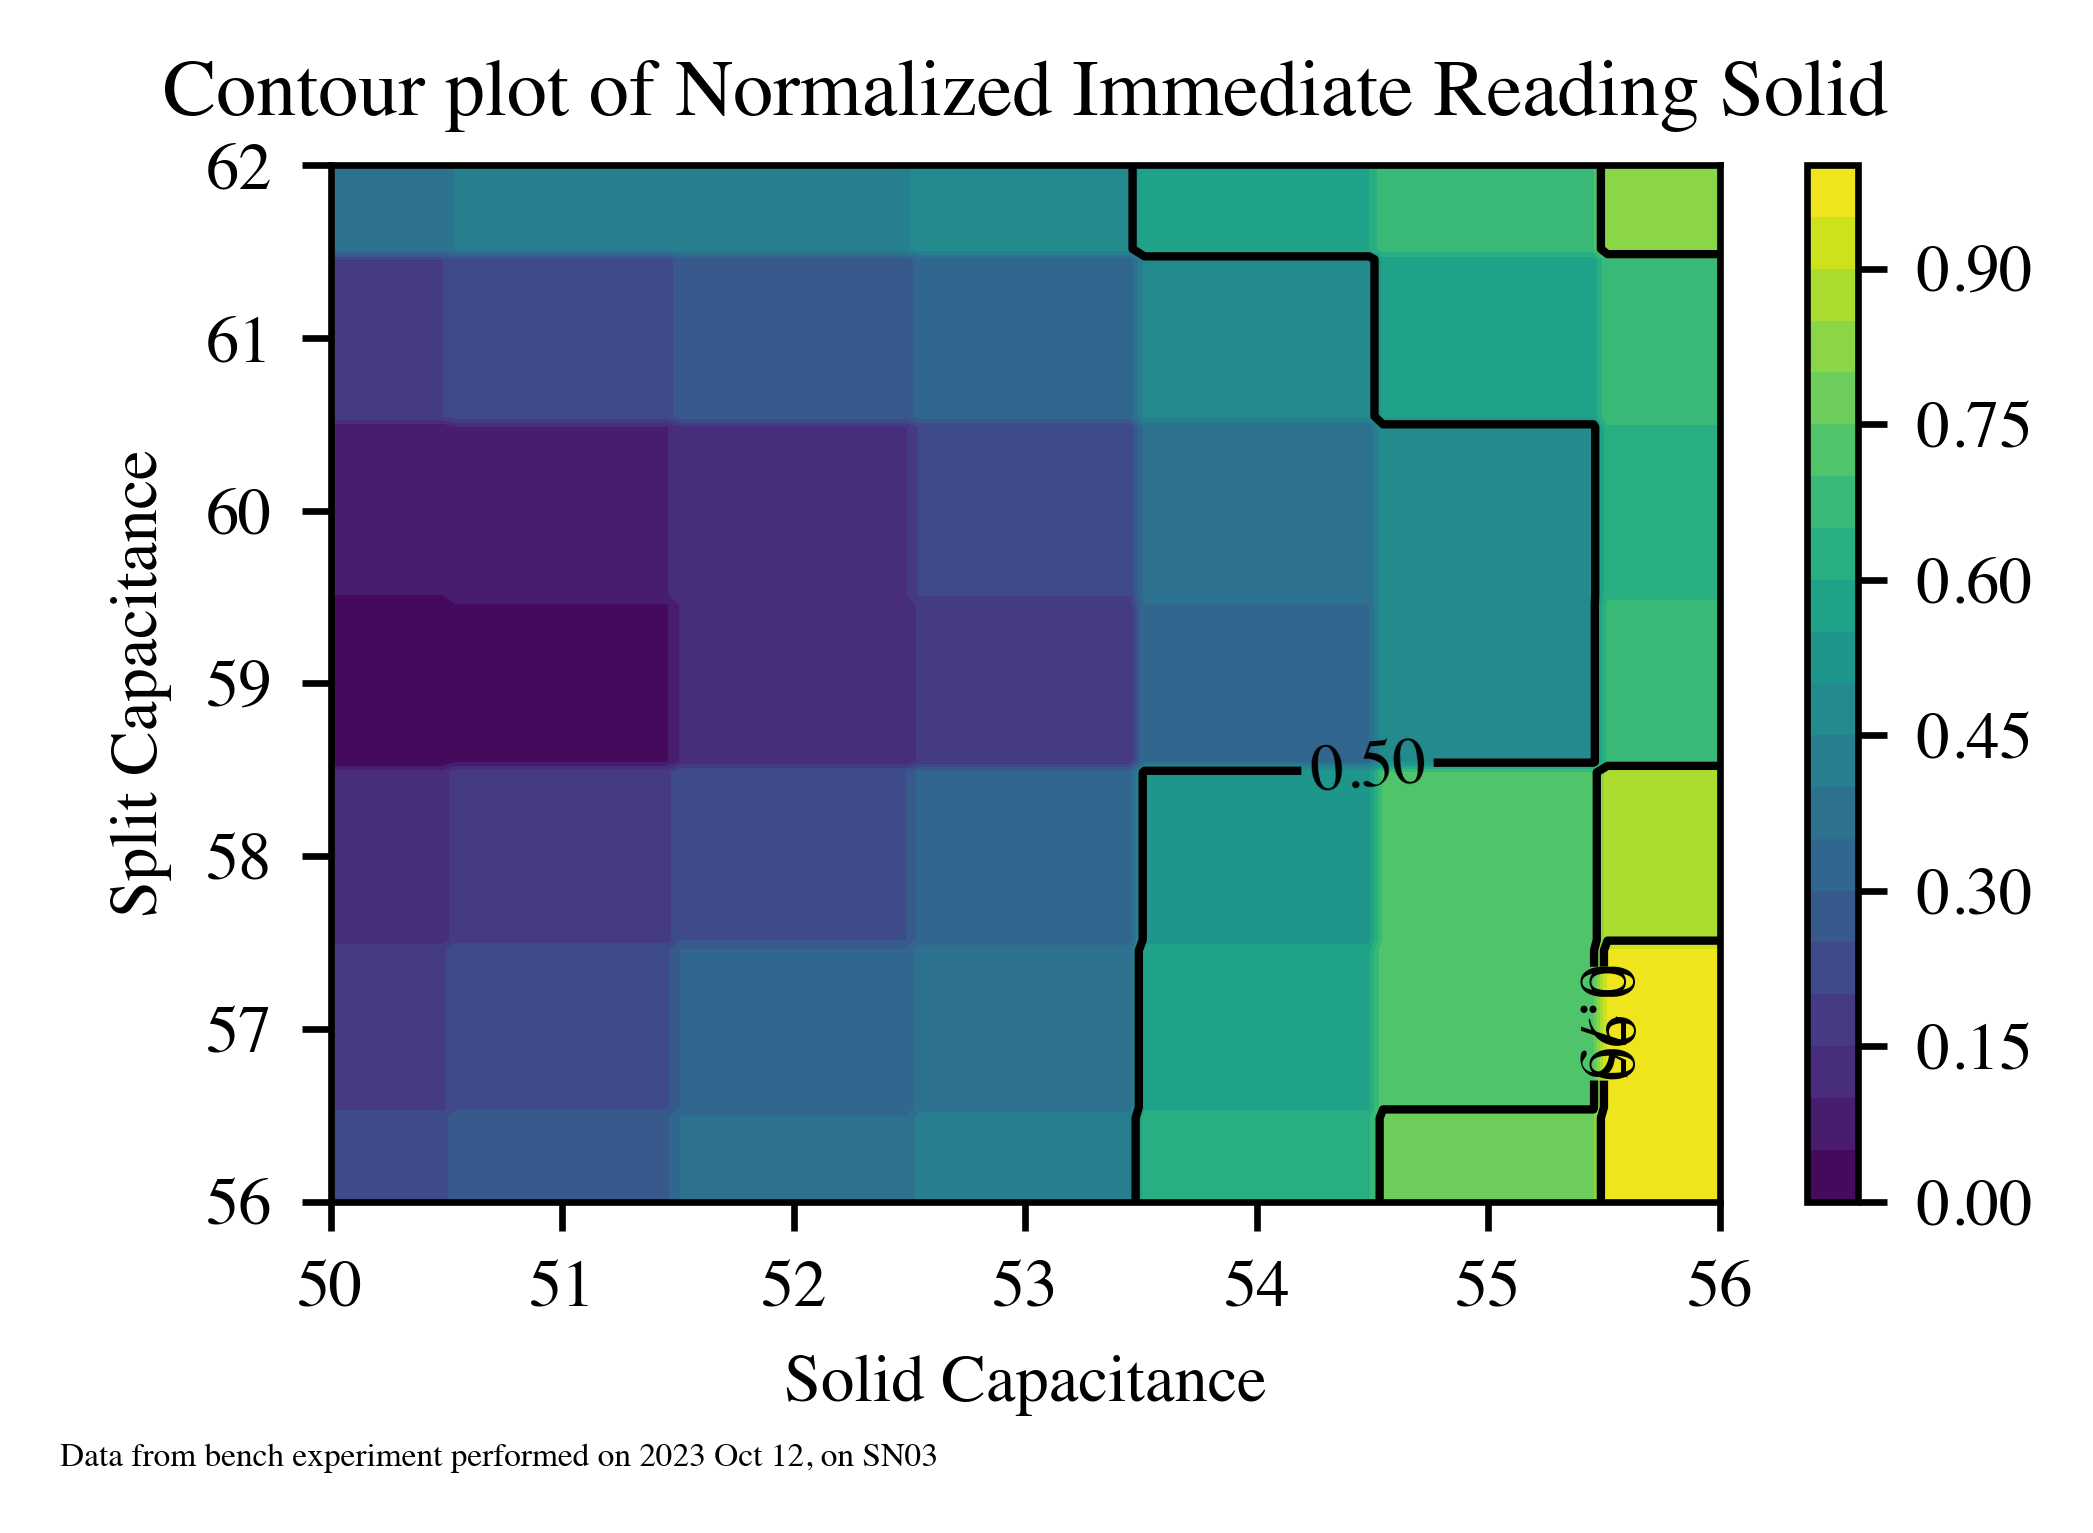

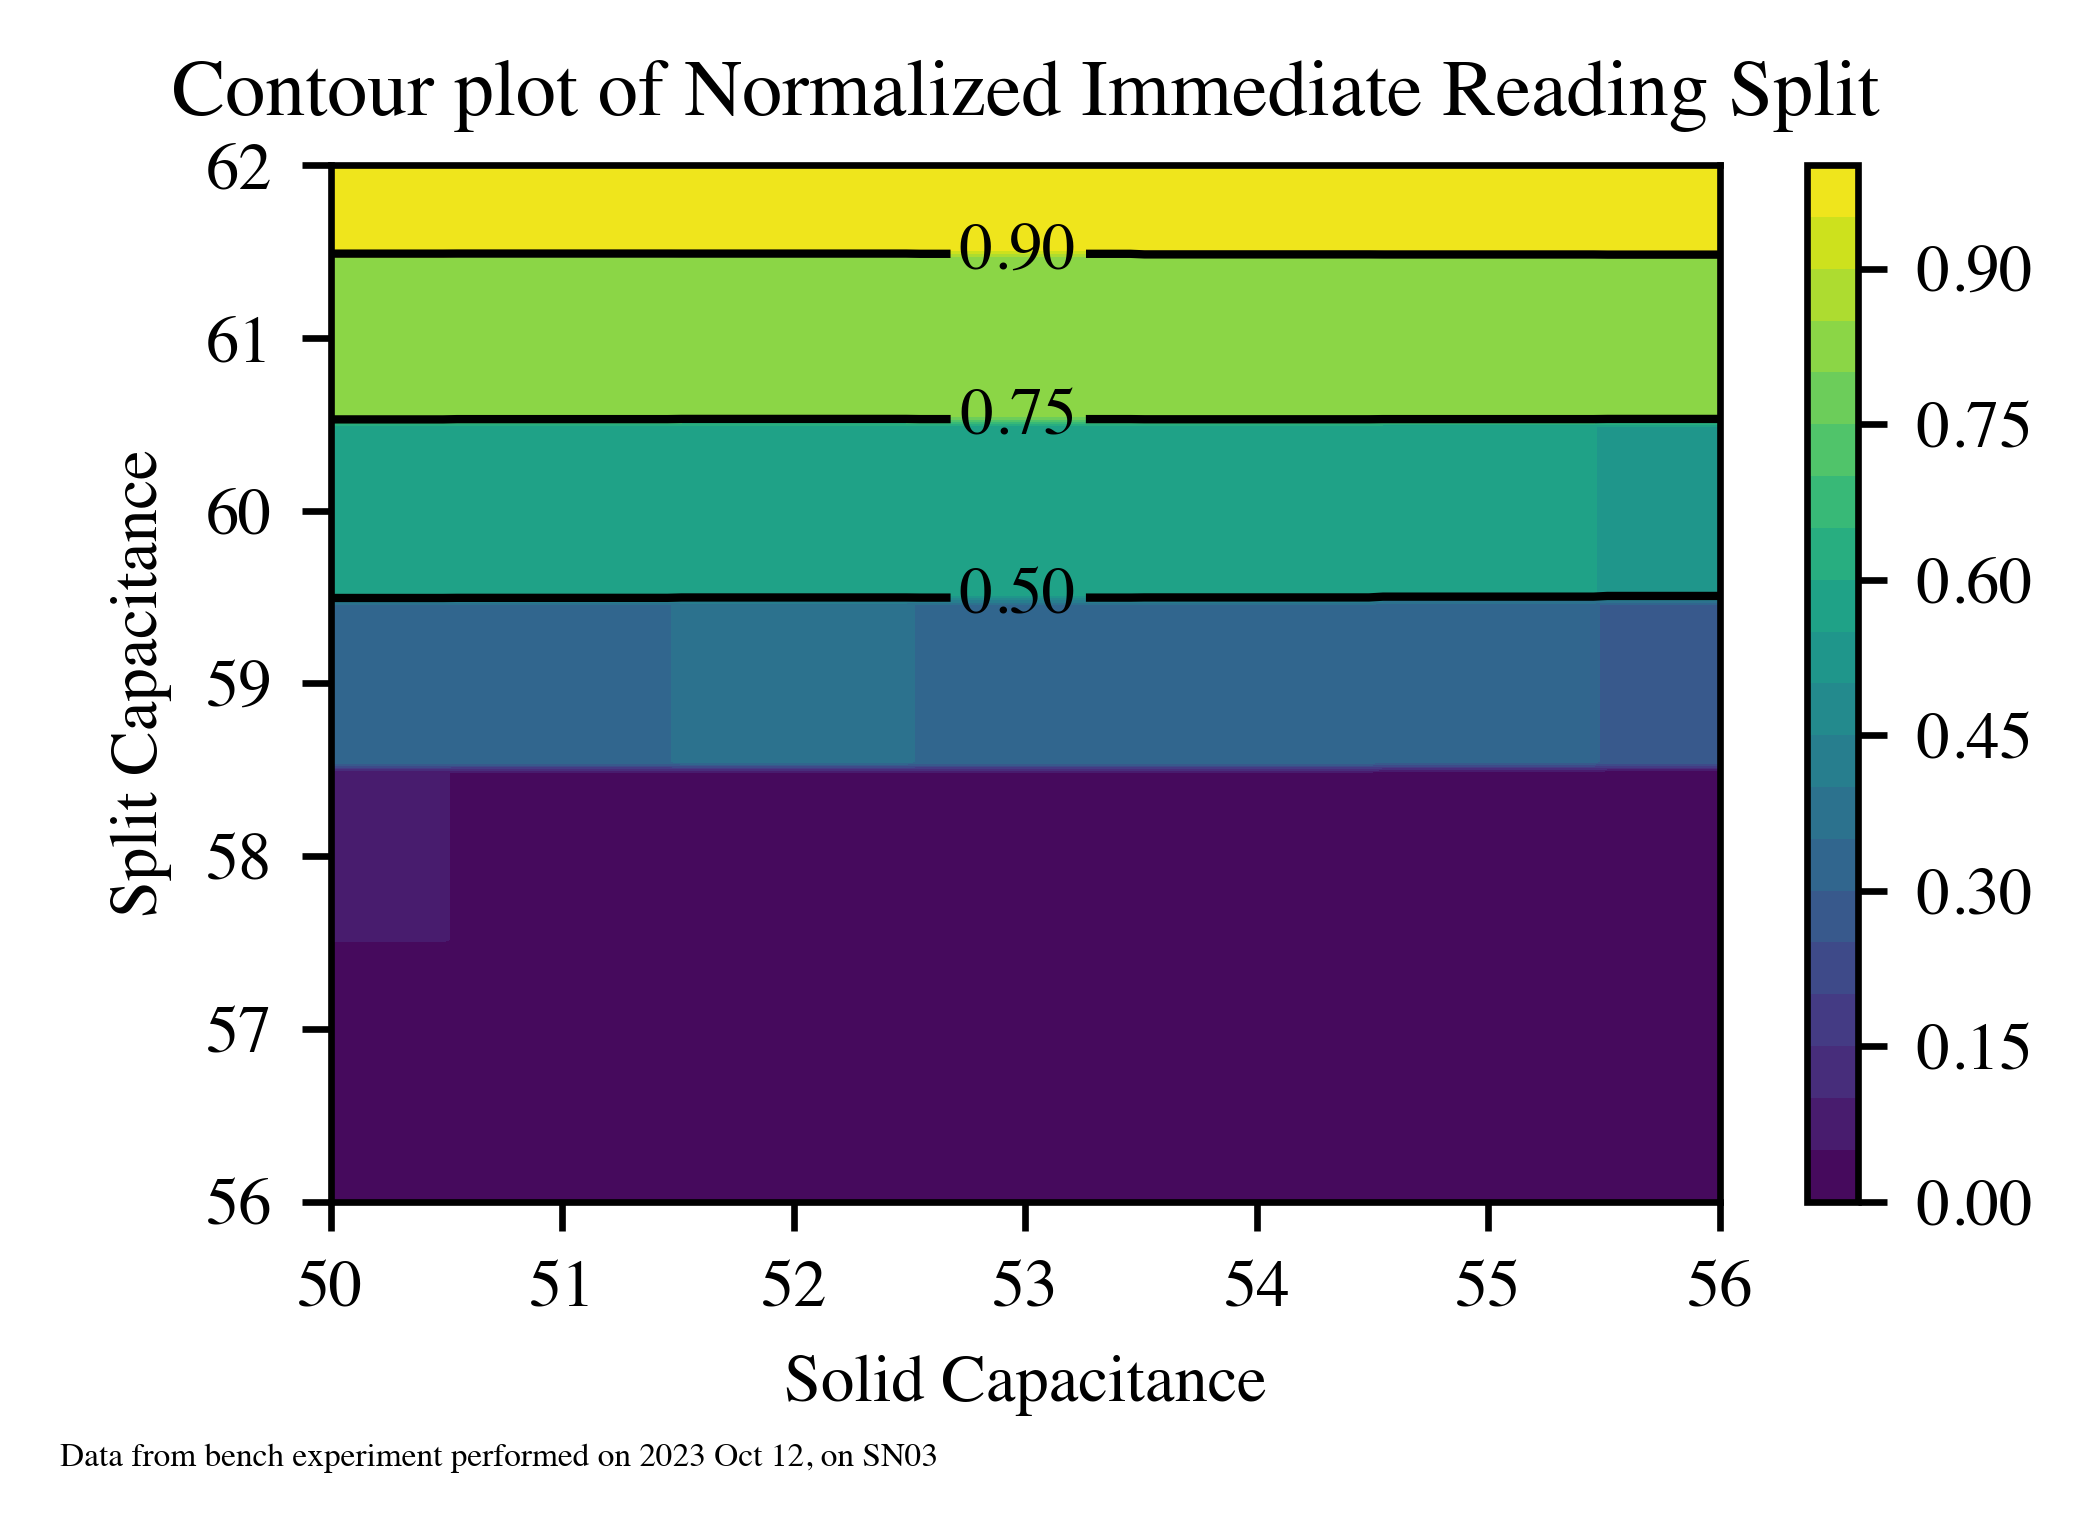

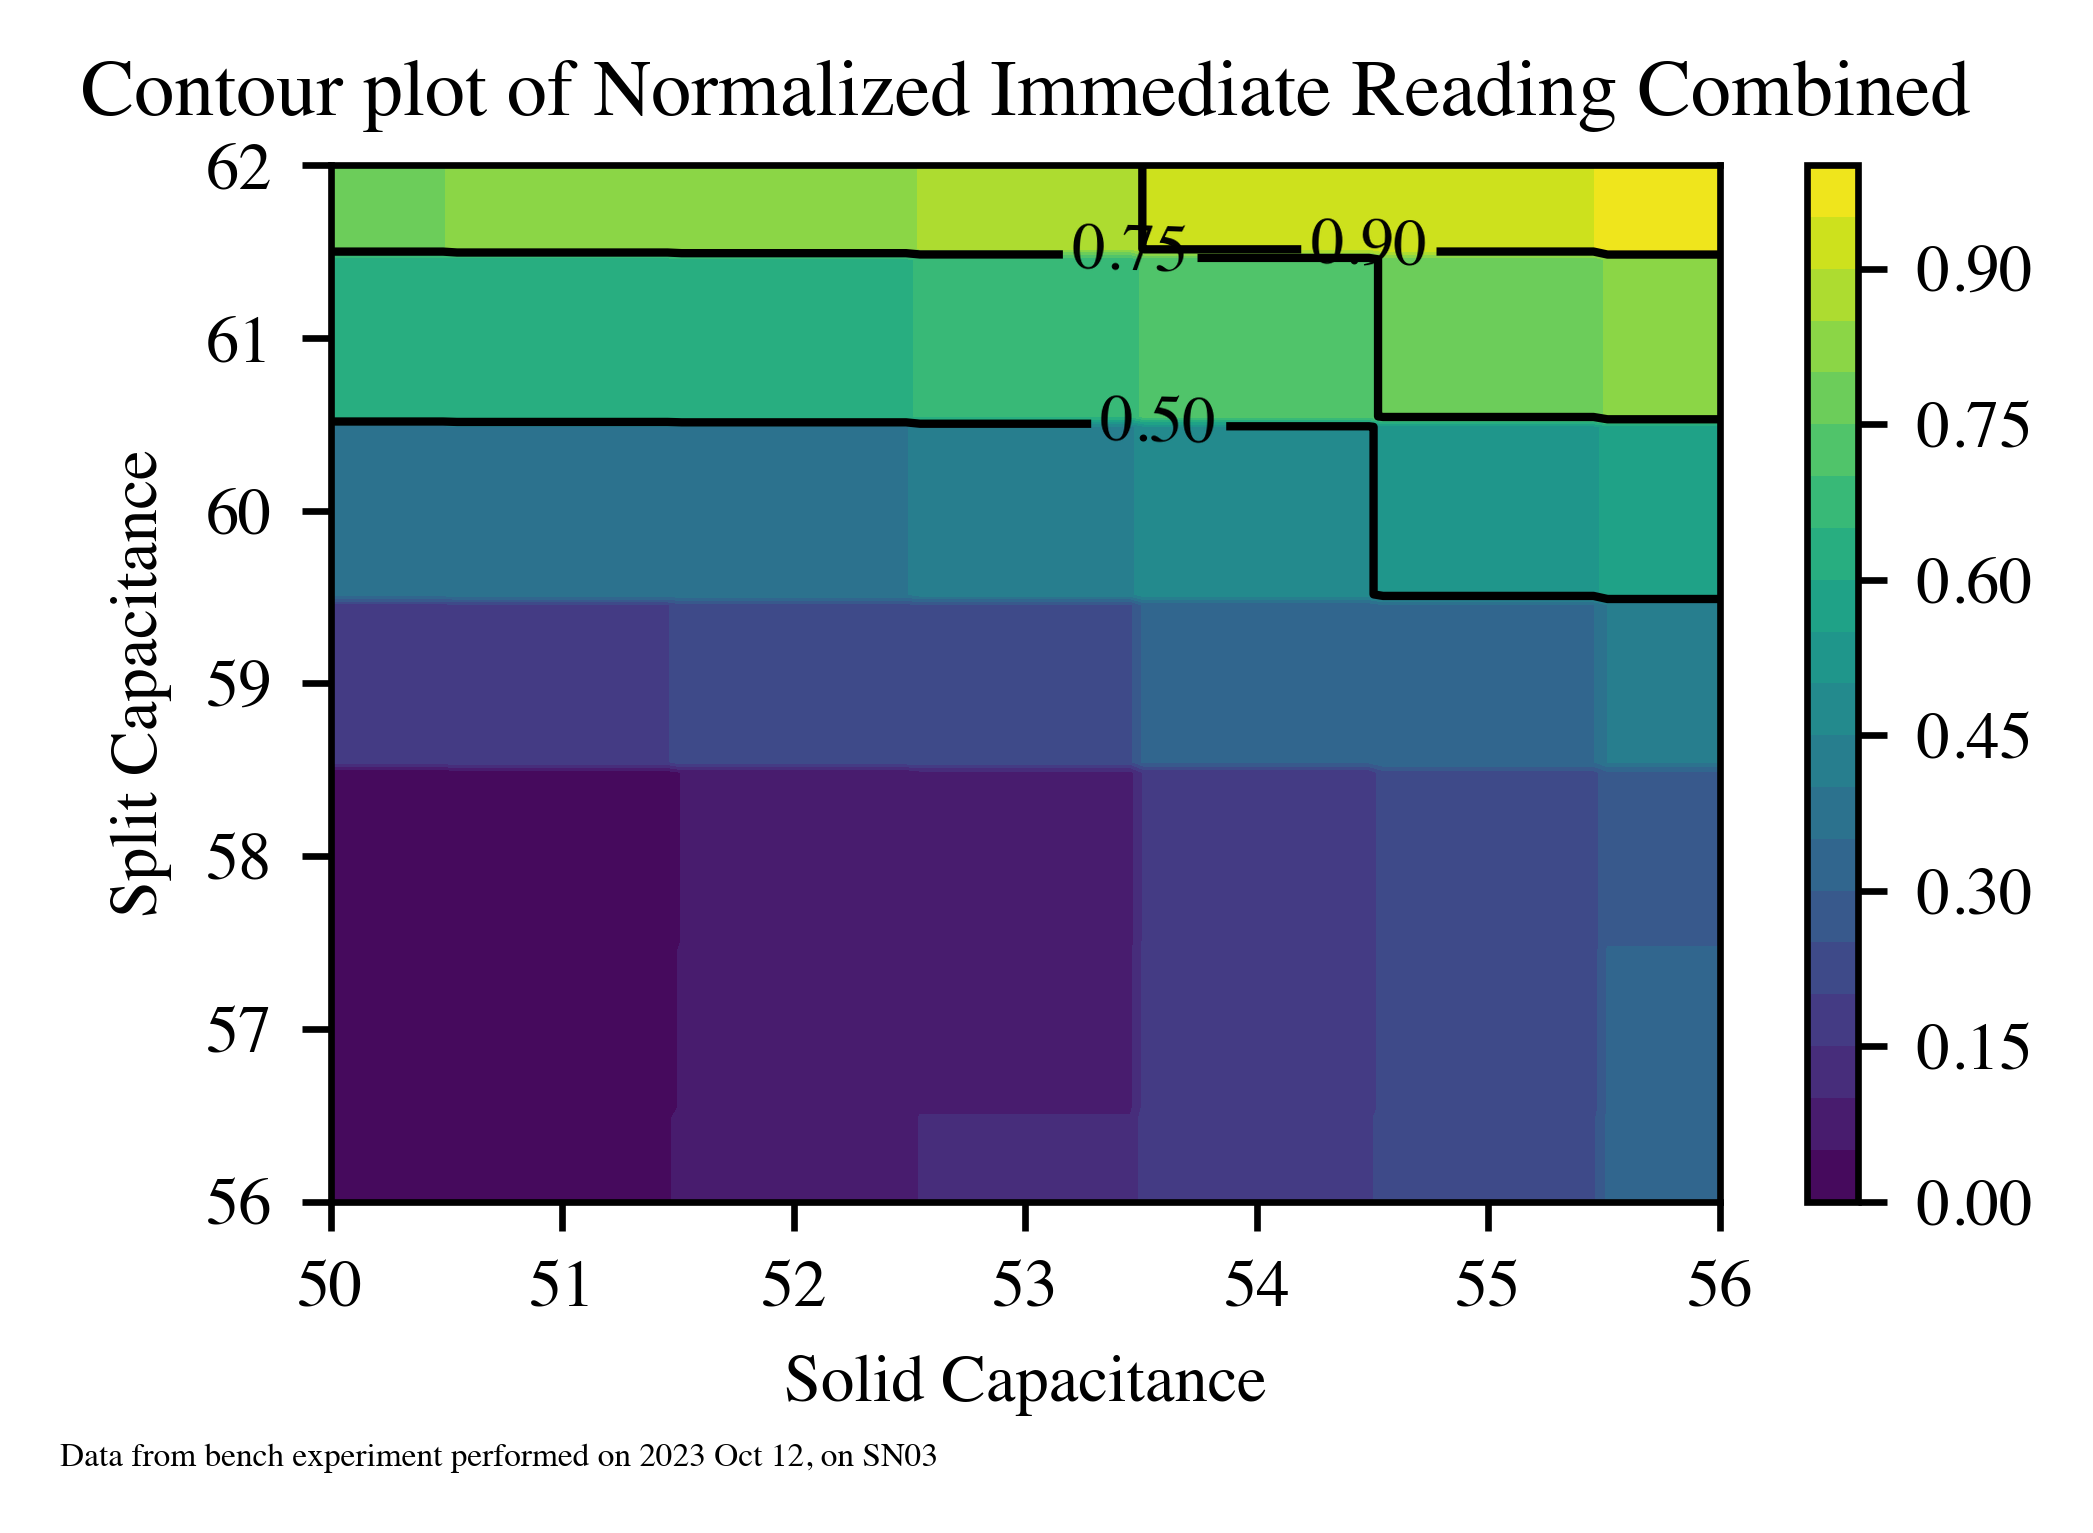

In [4]:
from scipy.interpolate import griddata

columns_to_plot = ['Immediate Reading Solid', 'Immediate Reading Split',
    'Immediate Reading Combined']

# Create grid
grid_x, grid_y = np.mgrid[min(df['Solid Capacitance']):max(df['Solid Capacitance']):100j,
                        min(df['Split Capacitance']):max(df['Split Capacitance']):100j]

for col in columns_to_plot:
    fig = plt.figure()
    col = f'Normalized {col}'
    # Interpolate
    grid_z = griddata((df['Solid Capacitance'], df['Split Capacitance']), df[col],
                    (grid_x, grid_y), method='nearest')

    # Specify contour levels (for increased spacing)
    contour_levels = np.linspace(0, 1, 21)  # adjust the number 10 for more or fewer levels

    # Plot filled contours (colored contours)
    contour_filled = plt.contourf(grid_x, grid_y, grid_z, levels=contour_levels, cmap="viridis")
    plt.colorbar(contour_filled)

    # # Plot contour lines with labels
    contour_lines = plt.contour(grid_x, grid_y, grid_z, levels=[0.5, 0.75, 0.9], colors='k')
    plt.clabel(contour_lines, inline=True, fontsize=8)

    plt.xlabel('Solid Capacitance')
    plt.ylabel('Split Capacitance')
    plt.title('Contour plot of ' + col)

    # Adding a footnote
    footnote = "Data from bench experiment performed on 2023 Oct 12, on SN03"
    fig.text(0.01, 0.01, footnote, ha='left', va='bottom', fontsize=4, color='k')

    fig.tight_layout()

    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_wireframe(grid_x, grid_y, grid_z, color='k')
    # ax.set_xlabel('Solid Capacitance')
    # ax.set_ylabel('Split Capacitance')
    # ax.set_zlabel('Normalized ' + col + ' ' + str(av) + 'V')
    # ax.set_title('3D Wireframe of ' + col + ' ' + str(av) + 'V')


plt.show()